# Cours sur l'algorithme KNN

### <span style="color:blue">*1 Exemple du cours*</span>  



<div style="border: 3px solid #A0A0A0; background: #A7C5DE; padding:10px "> 

Ce que font les différentes cellules : 
    
- **Récupérer** les données du fichier csv  
- **Créer** les listes de points pour les types 'chevalier' et 'fantassins'
- **Représenter** ces points
- **Introduire** un nouveau personnage cible
- **Utiliser** l'algrithme KNN pour trouver ses proches voisins
- **Predire** le type de la cible en fonction des plus proches voisins

    
</div>

In [1]:
# importer CSV et transfert dans une liste de listes [[force, courage, type]...] , on perd le nom ... mais pas grave.

import csv

def lire_fichier_csv(nom_fichier):
    dico = {}
    with  open(nom_fichier, 'r') as file :
        reader = csv.reader(file, delimiter = ';')        
        
        for elem in reader :
            dico[elem[0]] = [int(elem[1]), int(elem[2]), elem[3]]
#         return [elem for elem in reader]
        return list(dico.values())

table_personnages = lire_fichier_csv('personnages.csv')

print(table_personnages)

[[2, 12, 'Chevalier'], [15, 19, 'Chevalier'], [2, 5, 'Chevalier'], [15, 18, 'Chevalier'], [15, 7, 'Chevalier'], [4, 17, 'Chevalier'], [11, 9, 'Chevalier'], [1, 20, 'Chevalier'], [10, 10, 'Chevalier'], [12, 6, 'Chevalier'], [16, 5, 'Chevalier'], [20, 5, 'Chevalier'], [20, 1, 'Chevalier'], [1, 20, 'Chevalier'], [15, 7, 'Chevalier'], [1, 10, 'Chevalier'], [4, 12, 'Chevalier'], [18, 6, 'Chevalier'], [17, 20, 'Fantassin'], [20, 11, 'Fantassin'], [10, 13, 'Fantassin'], [15, 11, 'Fantassin'], [9, 12, 'Fantassin'], [8, 1, 'Fantassin'], [18, 18, 'Fantassin'], [9, 5, 'Fantassin'], [4, 4, 'Fantassin'], [12, 16, 'Fantassin'], [8, 5, 'Fantassin'], [10, 12, 'Fantassin'], [4, 6, 'Fantassin'], [18, 5, 'Fantassin']]


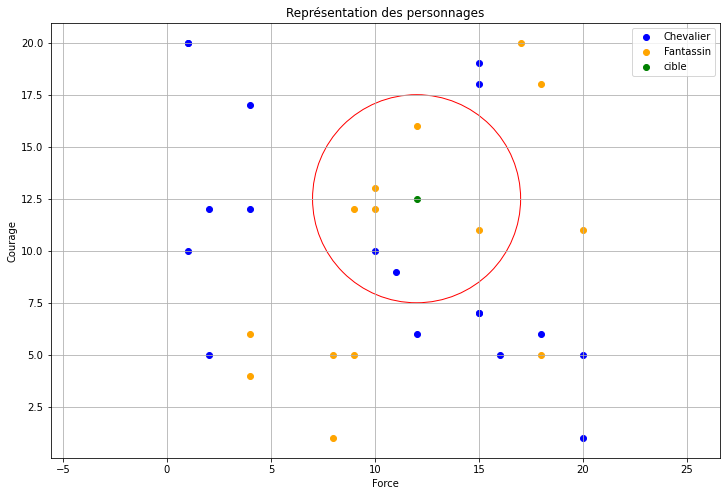

In [21]:
# Afficher , ajouter cible, ajouter cercle

import matplotlib.pyplot as plt

cible =(12, 12.5)
# cible =(15, 10)

fig, ax = plt.subplots(figsize=(12,8)) # dimension du graphique
plt.axis([0,22, 0, 22]) # Les axes Attention [x1,x2,y1,y2]
plt.axis('equal') # Pour avoir un repère orthonormé
plt.xlabel('Force') 
plt.ylabel('Courage')
plt.title('Représentation des personnages')
plt.grid() # affichage du quadrillage

for perso in table_personnages : 
    if perso[2] == 'Chevalier' :
        chev = plt.scatter(perso[0], perso[1], color = "blue")
    else : 
        fant = plt.scatter(perso[0], perso[1], color = "orange")

cib = plt.scatter(cible[0], cible[1], color = "green") #Place une cible.

ax.add_artist(plt.Circle((cible[0], cible[1]), 5, edgecolor='red', facecolor='none')) # place un cercle de diamètre 5 

# ax.add_artist(
#     plt.Rectangle((-15, 10), 50, 5,
#                       edgecolor = 'yellow', facecolor = 'none',
#                       fill = True, hatch = '/', linestyle = 'dashed',
#                       linewidth = 3, zorder = 1))

# ax.add_artist(
#     plt.Rectangle((2.5,0), 5, 25,
#                       edgecolor = 'cyan', facecolor = 'none',
#                       fill = True, hatch = '/', linestyle = 'dashed',
#                       linewidth = 3, zorder = 1))


# plt.legend() # affiche la légende
plt.legend((chev, fant, cib),('Chevalier', 'Fantassin', 'cible'))
plt.show() # affiche le graphique complet

In [23]:
# Recherche des voisins de la cible.

from math import *

table = table_personnages
cible=[12, 12.5] 
k = 7

def distance_cible(personnage) :
    distance = sqrt((cible[0]-int(personnage[0]))**2+(cible[1]-int(personnage[1]))**2)
    return distance

def k_plus_proches_voisins(table, cible, k) :    
    table_triee = sorted(table, key = distance_cible)  
    proches_voisins = table_triee[0:k]
    return proches_voisins

k_plus_proches_voisins(table,cible,k)

[[10, 13, 'Fantassin'],
 [10, 12, 'Fantassin'],
 [9, 12, 'Fantassin'],
 [10, 10, 'Chevalier'],
 [15, 11, 'Fantassin'],
 [12, 16, 'Fantassin'],
 [11, 9, 'Chevalier']]

In [24]:
cible =(12, 12.5)
# cible=[15, 10]

def prediction(unelist) :
    somme_fanta = 0
    somme_cheva = 0 
    for elem in unelist :
        somme_fanta += elem.count("Fantassin")
        somme_cheva += elem.count("Chevalier")
#     if somme_cheva > somme_fanta :
#         return "Chevalier"
#     else : 
#         return "Fantassin"    
    return "Chevalier" if somme_cheva > somme_fanta else "Fantassin"
    
prediction(k_plus_proches_voisins(table,cible,k))


'Fantassin'

# + loin sur l'algorithme KNN

### <span style="color:blue">**1. Utilisation simple des fonctions de SCIKIT**</span>  



<div style="border: 3px solid #A0A0A0; background: #A7C5DE; padding:10px "> 
    
Utilisation standard de prédiction 

    
</div>

In [5]:
from sklearn.neighbors import KNeighborsClassifier

In [14]:
Caractéristiques  = [[int(elem[0]), int(elem[1])] for elem in table_personnages]
Type = [elem[2] for elem in table_personnages]

k = 6

myKNN = KNeighborsClassifier(n_neighbors=k) # Classifieur avec réglage des paramètres 
myKNN.fit(Caractéristiques, Type) # "apprentissage de l'IA"

cible=[12, 12.5] #Désignation de la cible
# cible=[5, 12.5] #Désignation de la cible
print('la cible est un : ', myKNN.predict([cible])[0]) #Prédiction
print('la probalité de la cible est [Chevalier / Fantassin]: ', myKNN.predict_proba([cible])[0]) #Probabilités
print(f'le score de KNN pour k = {k} est : ', myKNN.score(Caractéristiques, Type)) #Score

la cible est un :  Fantassin
la probalité de la cible est [Chevalier / Fantassin]:  [0.16666667 0.83333333]
le score de KNN pour k = 6 est :  0.75


### <span style="color:blue">*2. Utilisation avancée des fonctions de SCIKIT*</span>  



<div style="border: 3px solid #A0A0A0; background: #A7C5DE; padding:10px "> 
    
Pour aller beaucoup plus loin , choix du paramètre K

    
</div>

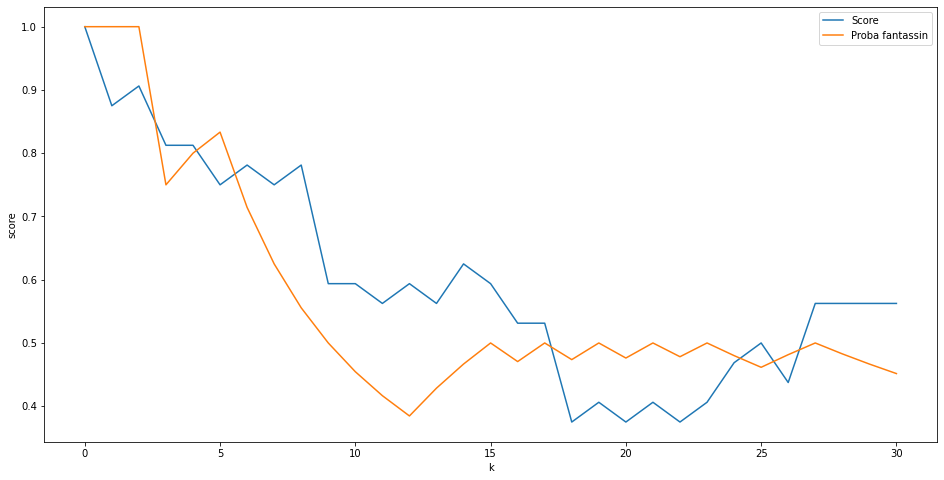

In [15]:
liste_score = []
liste_proba = []

for k in range(1,len(table_personnages)) :
    myKNN = KNeighborsClassifier(n_neighbors=k) # Classifieur avec réglage des paramètres 
    myKNN.fit(Caractéristiques, Type) # "apprentissage de l'IA"
    liste_score.append(myKNN.score(Caractéristiques, Type))
#     print(myKNN.score(Caractéristiques, Type)) #Score
    liste_proba.append(myKNN.predict_proba([cible])[0][1])
    
plt.figure(figsize=(16, 8))
plt.xlabel('k') 
plt.ylabel('score')
plt.plot(liste_score, label='Score')
plt.plot(liste_proba, label='Proba fantassin')
plt.legend() # affiche la légende
plt.show()

In [ ]:
# le meilleur choix pour la cible désignée est k = 1 ou k = 3 --> score > 90% et proba = 100%